In [14]:
import sys
sys.path.append('../src')
import util
import numpy as np
from networkx import nx
from synth_generate import make_rp_graph
from collections import Counter
import plfit
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
G1 = nx.barabasi_albert_graph(n=5000, m=4)
G2 = make_rp_graph('directed'  , n_max=5000*4, r=1, p=0.01, grow=True, m=4, directed=True)[0]
G3 = make_rp_graph('undirected', n_max=5000*4, r=1, p=0, grow=True, m=4, directed=False)[0]

In [22]:
print("Graph 1 has %d nodes and %d edges" % (G1.number_of_nodes(), G1.number_of_edges()))
print("Graph 2 has %d nodes and %d edges" % (G2.number_of_nodes(), G2.number_of_edges()))
print("Graph 3 has %d nodes and %d edges" % (G3.number_of_nodes(), G3.number_of_edges()))

Graph 1 has 5000 nodes and 19984 edges
Graph 2 has 5000 nodes and 20000 edges
Graph 3 has 5003 nodes and 20002 edges


In [23]:
degs1 = Counter(dict(G1.degree()).values())
degs2 = Counter(dict(G2.in_degree()).values())
degs3 = Counter(dict(G3.degree()).values())

In [26]:
gamma1 = plfit.plfit(dict(G1.degree()).values())._alpha
gamma2 = plfit.plfit(dict(G2.in_degree()).values())._alpha
gamma3 = plfit.plfit(dict(G3.degree()).values())._alpha
print("Graph 1 has gamma=%.3f and 'p'=%.3f" % (gamma1, (gamma1-3)/(gamma1-1)))
print("Graph 2 has gamma=%.3f and 'p'=%.3f" % (gamma2, (gamma2-2)/(gamma2-1)))
print("Graph 3 has gamma=%.3f and 'p'=%.3f" % (gamma3, (gamma3-3)/(gamma3-1)))

Graph 1 has gamma=2.849 and 'p'=-0.082
Graph 2 has gamma=1.540 and 'p'=-0.851
Graph 3 has gamma=2.791 and 'p'=-0.116


/Users/janovergoor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in power
/Users/janovergoor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in power
/Users/janovergoor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in power


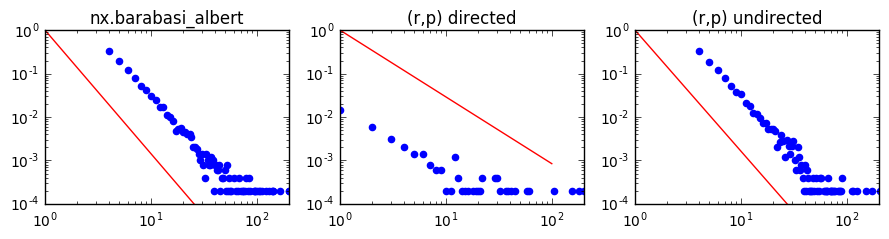

In [29]:
plt.figure(figsize=(9,2.5))
plt.subplot(131)
plt.scatter(degs1.keys(), [float(y)/sum(degs1.values()) for y in degs1.values()], color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 200)
plt.ylim(0.0001, 1)
plt.plot(np.arange(100), np.power(np.arange(100),-gamma1), color='r')
plt.title("nx.barabasi_albert")

plt.subplot(132)
plt.scatter(degs2.keys(), [float(y)/sum(degs2.values()) for y in degs2.values()], color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 200)
plt.ylim(0.0001, 1)
plt.plot(range(100), np.power(np.arange(100),-gamma2), color='r')
plt.title("(r,p) directed")

plt.subplot(133)
plt.scatter(degs3.keys(), [float(y)/sum(degs3.values()) for y in degs3.values()], color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 200)
plt.ylim(0.0001, 1)
plt.plot(range(100), np.power(np.arange(100),-gamma3), color='r')
plt.title("(r,p) undirected")

plt.tight_layout()
#plt.show()

/Users/janovergoor/anaconda/lib/python2.7/site-packages/plfit/plfit.py:805: RuntimeWarning: invalid value encountered in power
  Ppl = lambda X: 1+C*(xmin/(1-alpha)*(X/xmin)**(1-alpha))
/Users/janovergoor/anaconda/lib/python2.7/site-packages/plfit/plfit.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  a = 1+float(n) / sum(log(x/xmin))


PYTHON plfit executed in 0.069775 seconds
xmin: 0.553744 n(>xmin): 286 alpha: 2.6718 +/- 0.0988553   Log-Likelihood: -141.058   ks: 0.0397119 p(ks): 0.395282


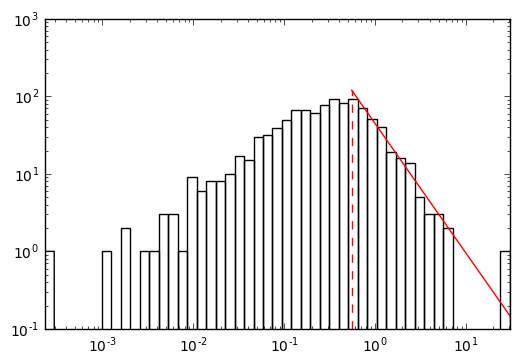

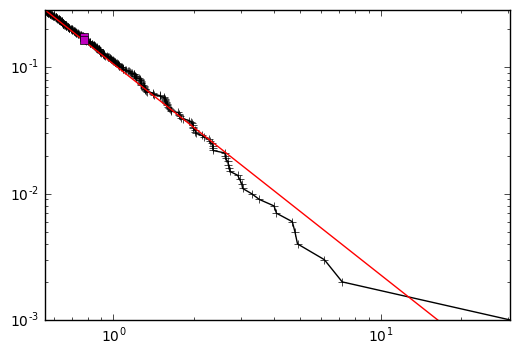

In [39]:
import plfit
from numpy.random import rand,seed
# generate a power law using the "inverse" power-law generator code
X=plfit.plexp_inv(rand(1000),1,2.5)
# use the numpy version to fit (usefortran=False is only needed if you installed the fortran version)
myplfit=plfit.plfit(X,usefortran=False)
# output should look something like this:
# PYTHON plfit executed in 0.201362 seconds
# xmin: 0.621393 n(>xmin): 263 alpha: 2.39465 +/- 0.0859979   Log-Likelihood: -238.959   ks: 0.0278864 p(ks): 0.986695
# generate some plots
from pylab import *
figure(1)
myplfit.plotpdf()
figure(2)
myplfit.plotcdf()

In [61]:
gs = []
for i in range(10):
    G = nx.barabasi_albert_graph(n=10000, m=1)
    X = dict(G.degree()).values()
    fit = plfit.plfit(X, discrete=True)
    gs.append(fit._alpha)
np.mean(gs)

2.761973546165216

In [66]:
ns = [1000, 10000, 50000, 100000, 500000, 1000000, 5000000]
for n in ns:
    gs = []
    for i in range(5):
        G = nx.barabasi_albert_graph(n=n, m=1)
        X = dict(G.degree()).values()
        fit = plfit.plfit(X, discrete=True)
        gs.append(fit._alpha)
    print("n=%7d gamma=%.3f" % (n, np.mean(gs)))

n=   1000 gamma=2.438
n=  10000 gamma=2.788
n=  50000 gamma=2.944
n= 100000 gamma=2.871
n= 500000 gamma=2.894
n=1000000 gamma=2.910
n=5000000 gamma=2.942
